In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10

In [20]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Check the shape of the data
print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels shape: {y_test.shape}")

# Check the class distribution
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print(f"Class distribution in training data: {class_distribution}")

Training data shape: (50000, 32, 32, 3), Labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3), Labels shape: (10000, 1)
Class distribution in training data: {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}


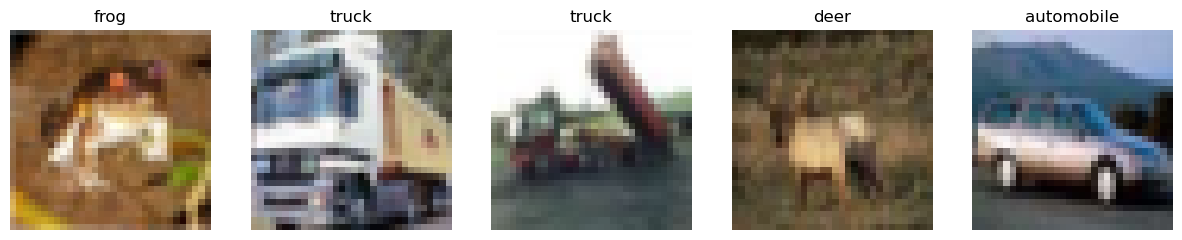

In [21]:
# Plot a few examples of the CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(x_train[i])
    axes[i].set_title(class_names[int(y_train[i])])
    axes[i].axis('off')
plt.show()

In [22]:
# Normalize the data to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [23]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [24]:
# Create a validation set from the training data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [25]:
from tensorflow.keras import layers, models

# Define the CNN model using the list format
def create_cnn_model(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        
        layers.Flatten(),
        
        layers.Dense(64, activation='relu'),
        
        layers.Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Create the model
cnn_model = create_cnn_model()
cnn_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

In [26]:
# Train the model
history = cnn_model.fit(x_train, y_train, 
                        epochs=10, 
                        batch_size=64, 
                        validation_data=(x_val, y_val),
                        verbose=2)  # Show progress during training


Epoch 1/10
704/704 - 10s - loss: 1.5915 - accuracy: 0.4202 - val_loss: 1.3720 - val_accuracy: 0.5058 - 10s/epoch - 14ms/step
Epoch 2/10
704/704 - 9s - loss: 1.2436 - accuracy: 0.5597 - val_loss: 1.1485 - val_accuracy: 0.5980 - 9s/epoch - 13ms/step
Epoch 3/10
704/704 - 9s - loss: 1.0869 - accuracy: 0.6158 - val_loss: 1.0552 - val_accuracy: 0.6202 - 9s/epoch - 13ms/step
Epoch 4/10
704/704 - 9s - loss: 0.9915 - accuracy: 0.6493 - val_loss: 0.9974 - val_accuracy: 0.6476 - 9s/epoch - 13ms/step
Epoch 5/10
704/704 - 9s - loss: 0.9212 - accuracy: 0.6781 - val_loss: 0.9529 - val_accuracy: 0.6658 - 9s/epoch - 13ms/step
Epoch 6/10
704/704 - 9s - loss: 0.8552 - accuracy: 0.6998 - val_loss: 0.9083 - val_accuracy: 0.6786 - 9s/epoch - 13ms/step
Epoch 7/10
704/704 - 9s - loss: 0.8033 - accuracy: 0.7196 - val_loss: 0.8825 - val_accuracy: 0.6970 - 9s/epoch - 13ms/step
Epoch 8/10
704/704 - 9s - loss: 0.7571 - accuracy: 0.7350 - val_loss: 0.8508 - val_accuracy: 0.7068 - 9s/epoch - 13ms/step
Epoch 9/10
704

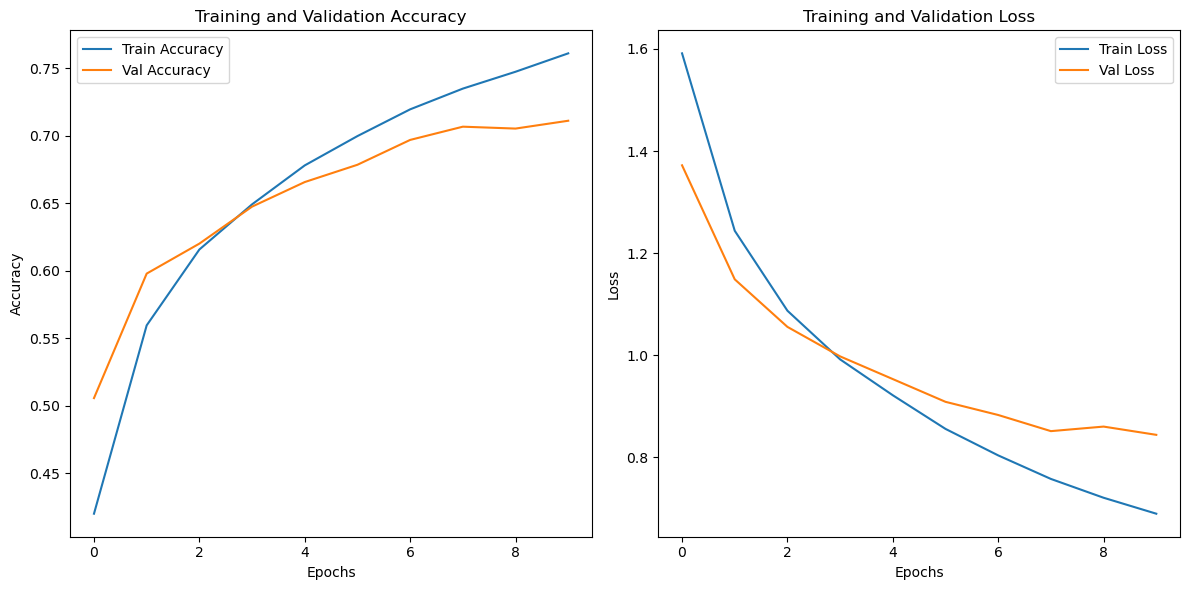

In [27]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
# Evaluate the model on the test set
test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")


313/313 - 1s - loss: 0.8485 - accuracy: 0.7074 - 782ms/epoch - 2ms/step
Test accuracy: 0.7074
Test loss: 0.8485


313/313 [==============================] - 1s 3ms/step


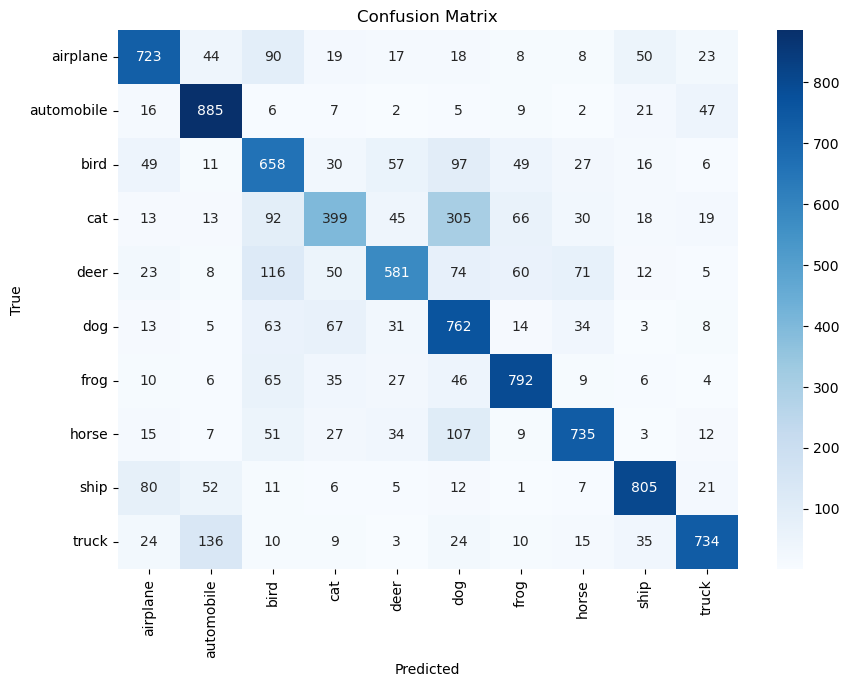

Classification Report:
              precision    recall  f1-score   support

    airplane       0.75      0.72      0.74      1000
  automobile       0.76      0.89      0.82      1000
        bird       0.57      0.66      0.61      1000
         cat       0.61      0.40      0.48      1000
        deer       0.72      0.58      0.64      1000
         dog       0.53      0.76      0.62      1000
        frog       0.78      0.79      0.78      1000
       horse       0.78      0.73      0.76      1000
        ship       0.83      0.81      0.82      1000
       truck       0.84      0.73      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict the classes for the test data
y_pred = cnn_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Print classification report (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), y_pred_classes, target_names=class_names))


Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.70440, saving model to best_model.h5
704/704 - 10s - loss: 0.6582 - accuracy: 0.7685 - val_loss: 0.9087 - val_accuracy: 0.7044 - 10s/epoch - 14ms/step
Epoch 2/50

Epoch 2: val_accuracy did not improve from 0.70440
704/704 - 9s - loss: 0.6265 - accuracy: 0.7803 - val_loss: 0.9664 - val_accuracy: 0.6806 - 9s/epoch - 13ms/step
Epoch 3/50

Epoch 3: val_accuracy improved from 0.70440 to 0.72460, saving model to best_model.h5
704/704 - 9s - loss: 0.5944 - accuracy: 0.7913 - val_loss: 0.8273 - val_accuracy: 0.7246 - 9s/epoch - 13ms/step
Epoch 4/50

Epoch 4: val_accuracy did not improve from 0.72460
704/704 - 9s - loss: 0.5678 - accuracy: 0.7999 - val_loss: 0.8694 - val_accuracy: 0.7118 - 9s/epoch - 13ms/step
Epoch 5/50

Epoch 5: val_accuracy did not improve from 0.72460
704/704 - 10s - loss: 0.5431 - accuracy: 0.8102 - val_loss: 0.8742 - val_accuracy: 0.7138 - 10s/epoch - 14ms/step
Epoch 6/50

Epoch 6: val_accuracy did not improve from

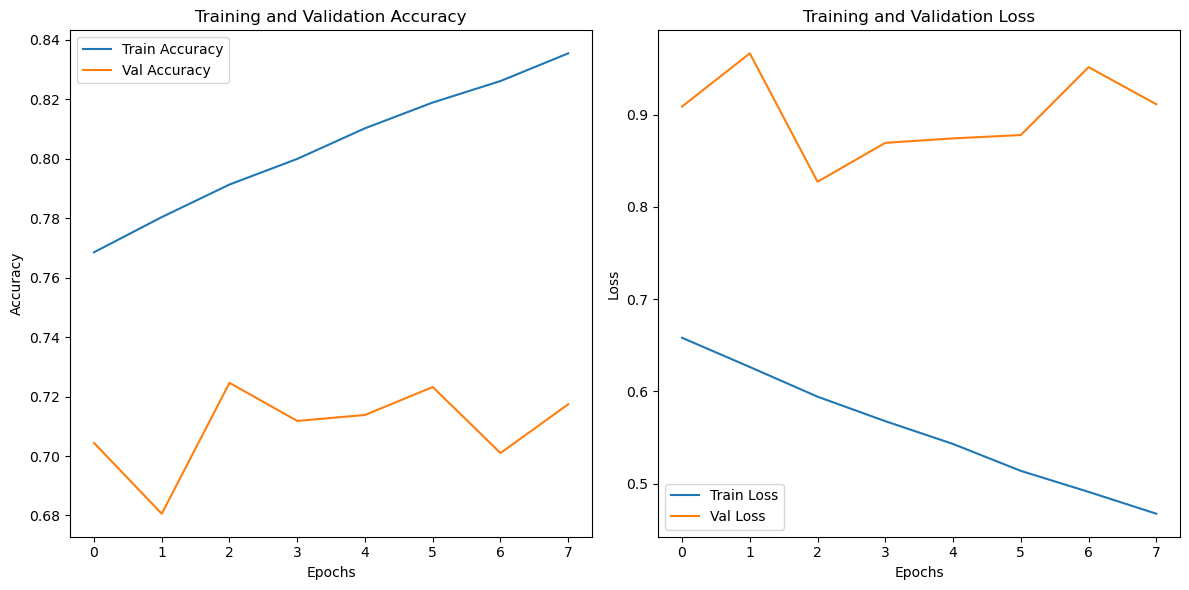

In [30]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Define the optimizer (Adam with a learning rate of 1e-3)
optimizer = Adam(learning_rate=1e-3)

# Compile the model (you can keep the same architecture from your initial model)
cnn_model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Define callbacks: EarlyStopping and ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model (train for more epochs and use the callbacks)
history = cnn_model.fit(
    x_train, y_train,
    epochs=50,  # Increase the number of epochs for better training
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, model_checkpoint],  # Include early stopping and checkpoint
    verbose=2
)

# Load the best model (in case early stopping was triggered)
cnn_model.load_weights('best_model.h5')

# Evaluate the improved model on the test set
test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Plot training & validation accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [31]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers.legacy import Adam  # Legacy Adam optimizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For data augmentation

# Define the legacy Adam optimizer (with a slightly higher learning rate)
optimizer = Adam(learning_rate=1e-3)

# Compile the model with the legacy Adam optimizer
cnn_model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Define callbacks: EarlyStopping and ModelCheckpoint with adjusted patience
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

# Data Augmentation setup
train_datagen = ImageDataGenerator(
    rotation_range=20,     # Random rotations
    width_shift_range=0.2,  # Horizontal shifts
    height_shift_range=0.2,  # Vertical shifts
    shear_range=0.2,        # Shear
    zoom_range=0.2,         # Zoom
    horizontal_flip=True,   # Random horizontal flip
    fill_mode='nearest'     # Fill missing pixels with the nearest value
)

# Fit the model using augmented data
history = cnn_model.fit(
    train_datagen.flow(x_train, y_train, batch_size=64),  # Using augmented data
    epochs=50,  # Train for more epochs
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, model_checkpoint],  # Include early stopping and checkpoint
    verbose=2
)

# Load the best model (in case early stopping was triggered)
cnn_model.load_weights('best_model.h5')

# Evaluate the improved model on the test set
test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Plot training & validation accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/50


2025-04-05 22:41:20.959320: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



Epoch 1: val_accuracy improved from -inf to 0.67100, saving model to best_model.h5
704/704 - 11s - loss: 1.2468 - accuracy: 0.5622 - val_loss: 0.9339 - val_accuracy: 0.6710 - 11s/epoch - 16ms/step
Epoch 2/50

Epoch 2: val_accuracy improved from 0.67100 to 0.68620, saving model to best_model.h5
704/704 - 11s - loss: 1.1723 - accuracy: 0.5881 - val_loss: 0.9049 - val_accuracy: 0.6862 - 11s/epoch - 15ms/step
Epoch 3/50

Epoch 3: val_accuracy did not improve from 0.68620
704/704 - 11s - loss: 1.1425 - accuracy: 0.5971 - val_loss: 0.9283 - val_accuracy: 0.6784 - 11s/epoch - 16ms/step
Epoch 4/50

Epoch 4: val_accuracy did not improve from 0.68620
704/704 - 11s - loss: 1.1178 - accuracy: 0.6062 - val_loss: 0.9536 - val_accuracy: 0.6626 - 11s/epoch - 15ms/step
Epoch 5/50

Epoch 5: val_accuracy improved from 0.68620 to 0.69000, saving model to best_model.h5
704/704 - 12s - loss: 1.1003 - accuracy: 0.6120 - val_loss: 0.8623 - val_accuracy: 0.6900 - 12s/epoch - 17ms/step
Epoch 6/50

Epoch 6: val

KeyboardInterrupt: 

In [32]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers.legacy import Adam  # Legacy Adam optimizer
from tensorflow.keras import layers, models

# Define the CNN model using the list format with Batch Normalization and Dropout
def create_cnn_model(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),  # Batch Normalization layer
        layers.Dropout(0.2),  # Dropout layer to reduce overfitting
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
        layers.Flatten(),
        
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),  # Dropout after the dense layer
        
        layers.Dense(num_classes, activation='softmax')
    ])
    
    # Use a slightly higher learning rate for Adam optimizer
    optimizer = Adam(learning_rate=1e-3)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Create the model
cnn_model = create_cnn_model()
cnn_model.summary()

# Define callbacks: EarlyStopping and ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model with a bit more patience and model checkpointing
history = cnn_model.fit(
    x_train, y_train,
    epochs=50,  # Train for more epochs
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, model_checkpoint],  # Include early stopping and checkpoint
    verbose=2
)

# Load the best model (in case early stopping was triggered)
cnn_model.load_weights('best_model.h5')

# Evaluate the improved model on the test set
test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Plot training & validation accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers.legacy import Adam  # Legacy Adam optimizer
from tensorflow.keras import layers, models

# Define the CNN model using the list format with Batch Normalization and Dropout
def create_cnn_model(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),  # Batch Normalization layer
        layers.Dropout(0.2),  # Dropout layer to reduce overfitting
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
        layers.Flatten(),
        
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),  # Dropout after the dense layer
        
        layers.Dense(num_classes, activation='softmax')
    ])
    
    # Use a slightly higher learning rate for Adam optimizer
    optimizer = Adam(learning_rate=1e-3)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Create the model
cnn_model = create_cnn_model()
cnn_model.summary()

# Define callbacks: EarlyStopping and ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model with a bit more patience and model checkpointing
history = cnn_model.fit(
    x_train, y_train,
    epochs=50,  # Train for more epochs
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, model_checkpoint],  # Include early stopping and checkpoint
    verbose=2
)

# Load the best model (in case early stopping was triggered)
cnn_model.load_weights('best_model.h5')

# Evaluate the improved model on the test set
test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Plot training & validation accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 15, 15, 32)       128       
 ormalization)                                                   
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 64)        

KeyboardInterrupt: 